In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('float_format', '{:.2f}'.format)

In [2]:
df = pd.read_csv('ecom.csv', encoding = 'unicode_escape')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.00,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

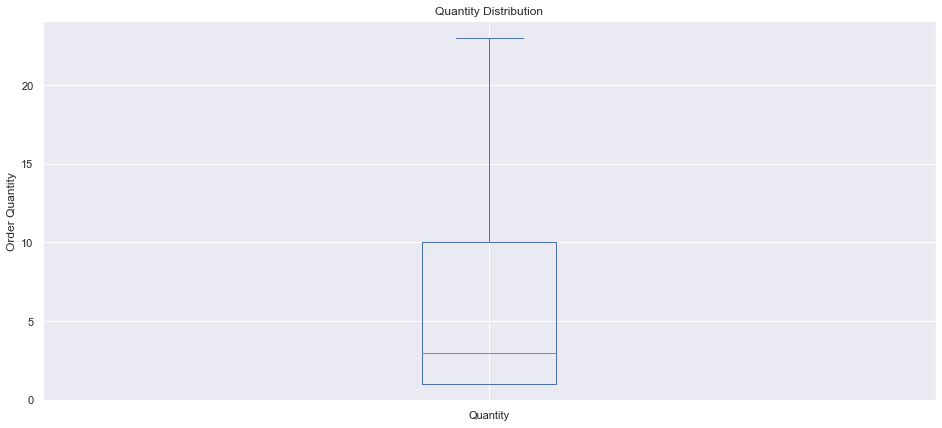

In [43]:
ax = df['Quantity'].plot.box(
    showfliers=False,
    grid=True,
    figsize=(16, 7)
)

ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')

plt.suptitle("")
plt.show()


In [7]:
df['Quantity'].describe()

count   541909.00
mean         9.55
std        218.08
min     -80995.00
25%          1.00
50%          3.00
75%         10.00
max      80995.00
Name: Quantity, dtype: float64

In [8]:
df = df.loc[df['Quantity']>0]

In [9]:
df.shape

(531285, 8)

In [10]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.00,United Kingdom,20.34


In [12]:
df['Sales'].describe()

count   531285.00
mean        20.04
std        270.91
min     -11062.06
25%          3.75
50%          9.90
75%         17.70
max     168469.60
Name: Sales, dtype: float64

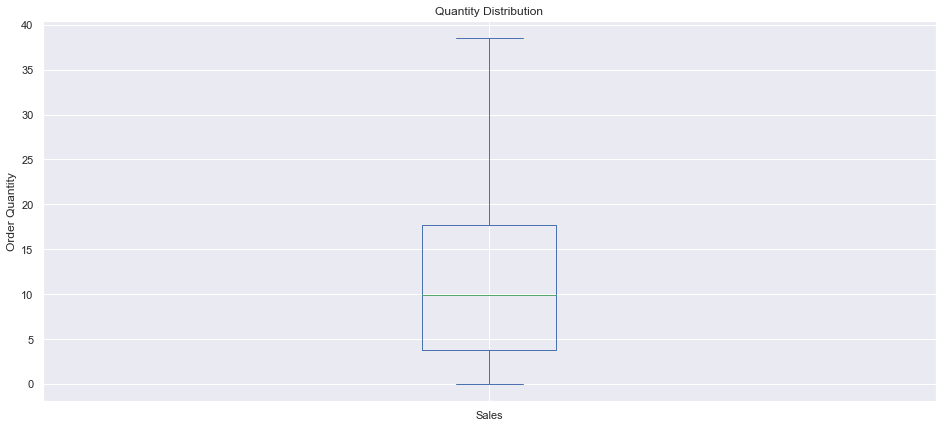

In [42]:
ax = df['Sales'].plot.box(
    showfliers=False,
    grid=True,
    figsize=(16, 7)
)

ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')

plt.suptitle("")
plt.show()


In [51]:
monthly_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()

In [52]:
monthly_revenue_df

InvoiceDate
2010-12-31    823746.14
2011-01-31    691364.56
2011-02-28    523631.89
2011-03-31    717639.36
2011-04-30    537808.62
2011-05-31    770536.02
2011-06-30    761739.90
2011-07-31    719221.19
2011-08-31    737014.26
2011-09-30   1058590.17
2011-10-31   1154979.30
2011-11-30   1509496.33
2011-12-31    638792.68
Freq: M, Name: Sales, dtype: float64

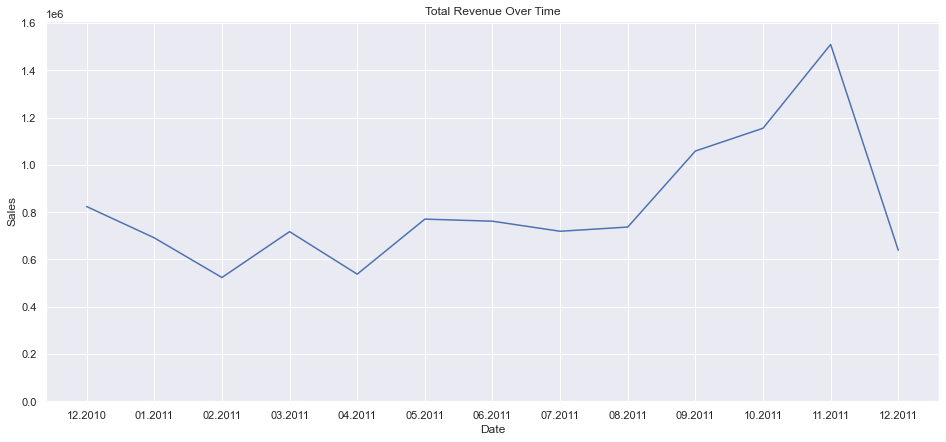

In [54]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(
    grid=True,
    figsize=(16,7),
    legend=False
)

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.set_title('Total Revenue Over Time')

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

plt.xticks(
    range(len(monthly_revenue_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_revenue_df.index], 
    
)

plt.show()



### Monthly Orders 

In [14]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
Sales          float64
dtype: object

In [15]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [16]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Sales                 float64
dtype: object

In [17]:
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

In [18]:
customer_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()

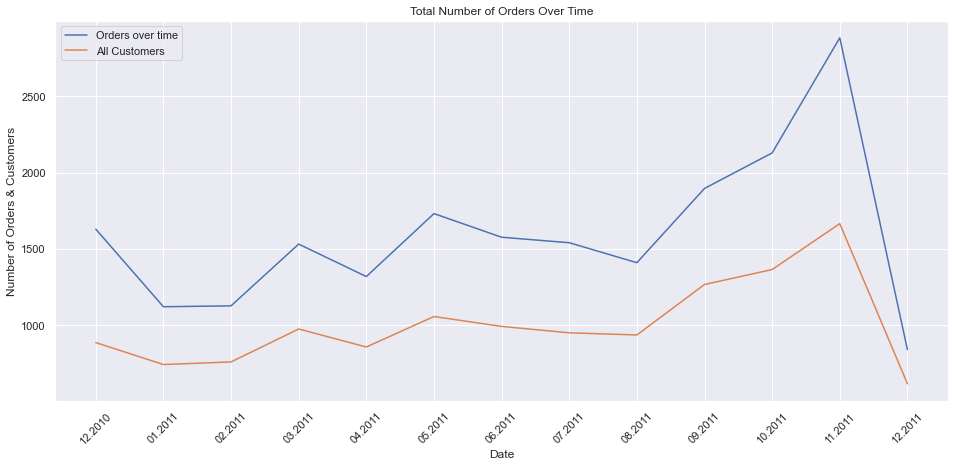

In [41]:
ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid=True,
    figsize=(16,7),
    legend=False
)

pd.DataFrame(customer_df.values).plot(
    ax=ax,
    grid=True
)


ax.set_xlabel('Date')
ax.set_ylabel('Number of Orders & Customers')
ax.set_title('Total Number of Orders Over Time')

ax.legend(['Orders over time', 'All Customers'])


plt.xticks(
    range(len(monthly_orders_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_orders_df.index], 
    rotation=45
)

plt.show()




### No. of Orders by Hour

In [20]:
df['Hour']=df.set_index('InvoiceDate').index.hour

In [21]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34,8


In [37]:
df_hour = pd.DataFrame(df.groupby(['Hour'])['Quantity'].count())

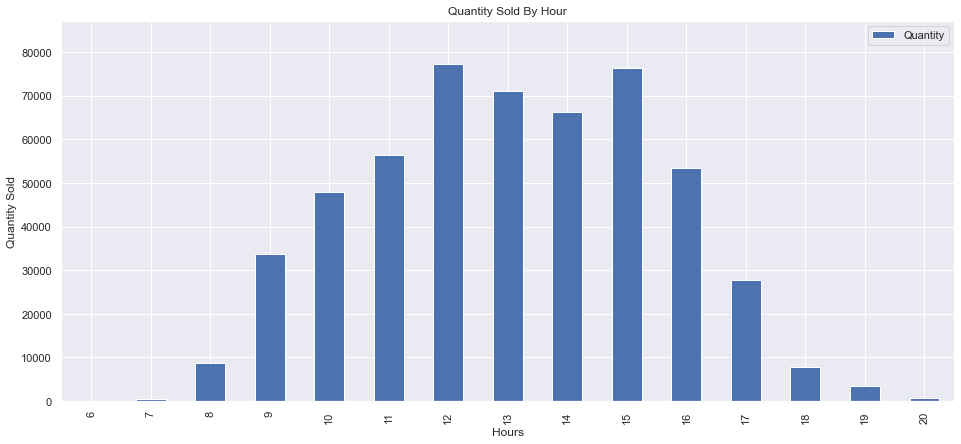

In [44]:
ax = df_hour.plot(
    kind='bar', 
    grid=True,
    figsize=(16,7))

ax.set_title('Quantity Sold By Hour')
ax.set_xlabel('Hours')
ax.set_ylabel('Quantity Sold')
ax.set_ylim([0, max(df_hour.values)+10000])
plt.show()

### Orders from Repeat Customers

In [22]:
monthly_repeat_customers_df = df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']


In [23]:
monthly_repeat_customers_df.head()

InvoiceDate
2010-12-31    855
2011-01-31    717
2011-02-28    726
2011-03-31    946
2011-04-30    831
Freq: M, Name: CustomerID, dtype: int64

In [24]:
invoice_customer_df = df.groupby(
    by=['InvoiceNo', 'InvoiceDate']
).agg({
    'Sales': sum,
    'CustomerID': max,
    'Country': max,
}).reset_index()

In [25]:
invoice_customer_df.head()

,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.00,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.00,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.00,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.00,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047.00,United Kingdom


In [26]:
monthly_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

In [27]:
monthly_repeat_customers_df.head()

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
Freq: M, Name: CustomerID, dtype: int64

In [28]:
monthly_unique_customer = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()

In [29]:
monthly_unique_customer.head()

InvoiceDate
2010-12-31    885
2011-01-31    741
2011-02-28    758
2011-03-31    974
2011-04-30    856
Freq: M, Name: CustomerID, dtype: int64

In [30]:
Repeat_customer_percentage = monthly_repeat_customers_df/monthly_unique_customer *100

In [31]:
Repeat_customer_percentage

InvoiceDate
2010-12-31   29.72
2011-01-31   20.65
2011-02-28   20.18
2011-03-31   20.84
2011-04-30   19.86
2011-05-31   26.61
2011-06-30   22.20
2011-07-31   23.92
2011-08-31   21.18
2011-09-30   21.48
2011-10-31   23.75
2011-11-30   32.49
2011-12-31   17.24
Freq: M, Name: CustomerID, dtype: float64

### Popular Items

#### Popular Items By Country

In [32]:
from scipy.stats import skew, mode

In [33]:
agg_func_text = {'Description':['nunique',mode]}
popular_item_by_country = df.groupby(['Country']).agg(agg_func_text)

In [34]:
popular_item_by_country 

Description  \
                         nunique   
Country                            
Australia                    608   
Austria                      306   
Bahrain                       16   
Belgium                      784   
Brazil                        32   
Canada                       147   
Channel Islands              436   
Cyprus                       498   
Czech Republic                25   
Denmark                      252   
EIRE                        2017   
European Community            50   
Finland                      465   
France                      1564   
Germany                     1697   
Greece                       138   
Hong Kong                    194   
Iceland                      103   
Israel                       255   
Italy                        476   
Japan                        216   
Lebanon                       45   
Lithuania                     29   
Malta                         99   
Netherlands                  803   
Norway                       595   
Poland                       205   
Portugal                     714   
RSA                           58   
Saudi Arabia                   9   
Singapore                    179   
Spain                       1105   
Sweden                       261   
Switzerland                  987   
USA                          163   
United Arab Emirates          68   
United Kingdom              4058   
Unspecified                  344   

                                                                      
                                                                mode  
Country                                                               
Australia                     ([RED TOADSTOOL LED NIGHT LIGHT], [9])  
Austria                                            ([POSTAGE], [14])  
Bahrain                  ([NOVELTY BISCUITS CAKE STAND 3 TIER], [2])  
Belgium                                            ([POSTAGE], [96])  
Brazil                           ([CLOCK MAGNET MUM'S KITCHEN], [1])  
Canada                         ([COLOURING PENCILS BROWN TUBE], [3])  
Channel Islands               ([DOORMAT HOME SWEET HOME BLUE ], [7])  
Cyprus                             ([REGENCY CAKESTAND 3 TIER], [8])  
Czech Republic          ([12 PENCILS SMALL TUBE RED RETROSPOT], [1])  
Denmark                                            ([POSTAGE], [13])  
EIRE                                             ([CARRIAGE], [106])  
European Community                                  ([POSTAGE], [3])  
Finland                                            ([POSTAGE], [37])  
France                                            ([POSTAGE], [300])  
Germany                                           ([POSTAGE], [374])  
Greece                                              ([POSTAGE], [3])  
Hong Kong                      ([MEASURING TAPE BABUSHKA PINK], [6])  
Iceland                   ([AIRLINE BAG VINTAGE JET SET BROWN], [6])  
Israel                               ([WOODLAND CHARLOTTE BAG], [4])  
Italy                                              ([POSTAGE], [17])  
Japan                        ([PACK OF 12 TRADITIONAL CRAYONS], [5])  
Lebanon                           ([12 EGG HOUSE PAINTED WOOD], [1])  
Lithuania                       ([FELTCRAFT CUSHION BUTTERFLY], [2])  
Malta                                 ([GRAND CHOCOLATECANDLE], [3])  
Netherlands                                        ([POSTAGE], [37])  
Norway                                             ([POSTAGE], [20])  
Poland                          ([LARGE CHINESE STYLE SCISSOR], [7])  
Portugal                                           ([POSTAGE], [30])  
RSA                             ([4 TRADITIONAL SPINNING TOPS], [1])  
Saudi Arabia                  ([ASSORTED BOTTLE TOP  MAGNETS ], [1])  
Singapore                                            ([Manual], [7])  
Spain                                              ([POSTAGE], [62])  
Sweden                                             ([POSTAG

### Revenue From Repeat Customers

In [48]:
monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M')['Sales'].sum()



In [50]:
monthly_rev_repeat_customers_df

InvoiceDate
2010-12-31   359170.60
2011-01-31   222124.00
2011-02-28   191229.37
2011-03-31   267390.48
2011-04-30   195474.18
2011-05-31   378197.04
2011-06-30   376307.26
2011-07-31   317475.00
2011-08-31   317134.25
2011-09-30   500663.36
2011-10-31   574006.87
2011-11-30   713775.85
2011-12-31   146833.97
Freq: M, Name: Sales, dtype: float64

In [55]:
Percentage_Repeat_Revenue = monthly_rev_repeat_customers_df/monthly_revenue_df *100

In [56]:
Percentage_Repeat_Revenue

InvoiceDate
2010-12-31   43.60
2011-01-31   32.13
2011-02-28   36.52
2011-03-31   37.26
2011-04-30   36.35
2011-05-31   49.08
2011-06-30   49.40
2011-07-31   44.14
2011-08-31   43.03
2011-09-30   47.30
2011-10-31   49.70
2011-11-30   47.29
2011-12-31   22.99
Freq: M, Name: Sales, dtype: float64